# Initial Setup
Before we begin, ensure that you have the necessary libraries installed in your Python environment. If you're working in Google Colab or a similar environment, you might need to install UMAP. scikit-learn, matplotlib, and seaborn are generally pre-installed, but you can reinstall them if needed.

In [ ]:
!pip install umap-learn
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=2c93912d525fd2670d43b8840f9566fd6a3ab2a305804bf56630bea04b22ffea
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


# Import Libraries
Import all the necessary Python libraries for data handling, visualization, dimensionality reduction, clustering, and classification.

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and Explore the Dataset
Load the dataset using pandas and explore its structure to understand the features.

In [ ]:
# Load dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(df.head())

# Basic information about the dataset
print(df.info())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

# Preprocess the Data
Depending on the dataset, preprocessing might include handling missing values, encoding categorical variables, and scaling the data. For this dataset, let’s assume we need to scale the features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Separating the features and the target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Identifying categorical columns (assuming non-numeric columns are categorical)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# One-Hot Encoding for categorical variables
one_hot_encoder = OneHotEncoder()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Displaying the first few rows of the processed features
X_encoded.head()



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Apply UMAP for Dimensionality Reduction
UMAP will be used to reduce the dimensionality of the data. The goal is to project the high-dimensional data into a 2D space for visualization and further analysis.

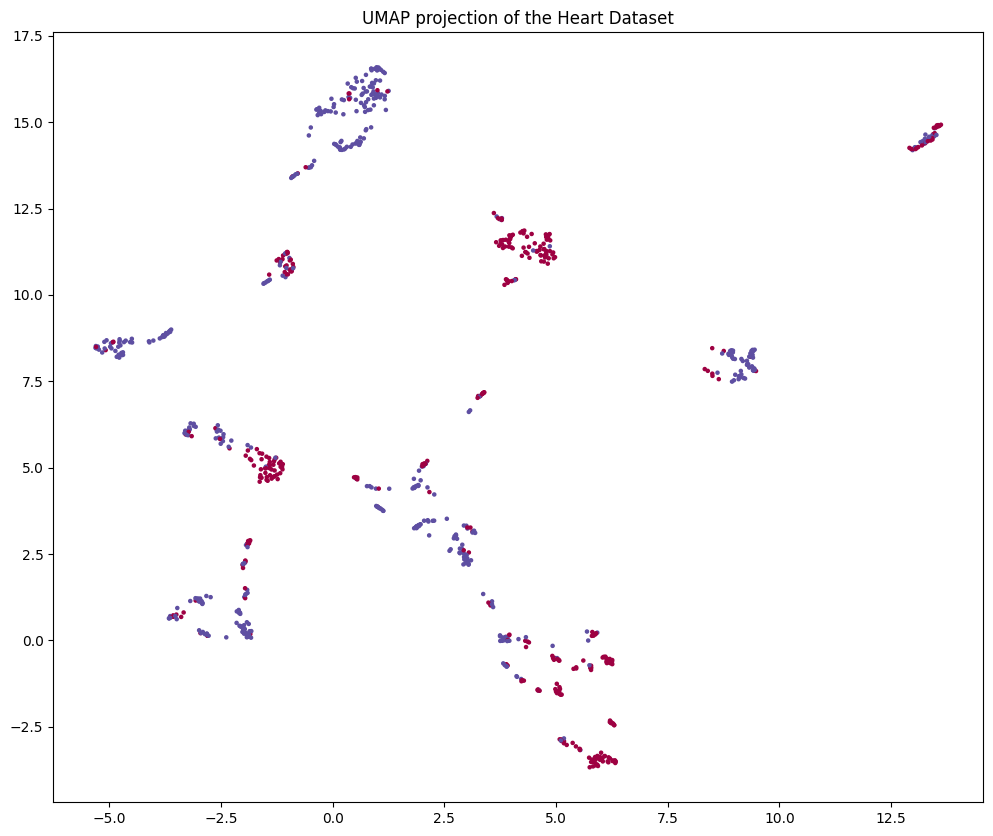

In [ ]:
umap_reducer = umap.UMAP()
embedding = umap_reducer.fit_transform(X_scaled)

# Plot the UMAP output for visualization
plt.figure(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.title('UMAP projection of the Heart Dataset', fontsize=12)
plt.show()


# Clustering on Reduced Dimensions

After reducing dimensions, apply a clustering algorithm like KMeans to identify patterns or groups.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


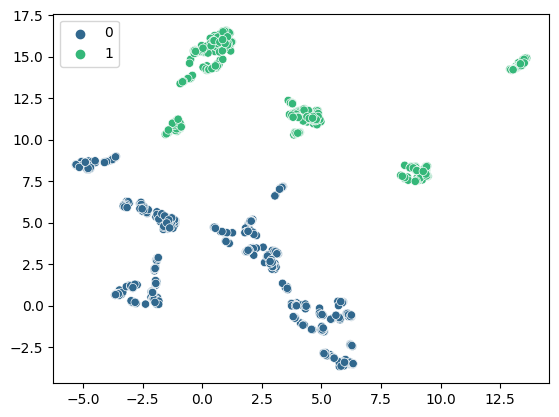

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2)  # assuming binary classification in 'target'
clusters = kmeans.fit_predict(embedding)

# Visualize the clusters
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=clusters, legend='full', palette='viridis')
plt.show()

# Classification Using Reduced Features
Use the reduced dimensions as features for classification. Split the data into training and testing sets, and then train a classifier.

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(embedding, y, test_size=0.3, random_state=42)

# Classification with RandomForest
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.8260869565217391


# Conclusion
Summarize the results and provide insights. Discuss the effectiveness of UMAP in this context and how the reduced dimensions impacted the clustering and classification results.